In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import imageio

In [65]:
image = imageio.imread('sera.jpg')
image

Array([[[ 24,  16,  13],
        [ 23,  15,  12],
        [ 23,  15,  12],
        ...,
        [133,  97,  75],
        [135,  99,  77],
        [137, 101,  79]],

       [[ 23,  15,  12],
        [ 22,  14,  11],
        [ 22,  14,  11],
        ...,
        [133,  97,  75],
        [133,  97,  75],
        [134,  98,  76]],

       [[ 23,  15,  12],
        [ 22,  14,  11],
        [ 22,  14,  11],
        ...,
        [132,  96,  74],
        [131,  95,  73],
        [131,  95,  73]],

       ...,

       [[ 70,  53,  45],
        [ 70,  53,  45],
        [ 63,  46,  36],
        ...,
        [ 45,  28,  20],
        [ 45,  28,  20],
        [ 45,  28,  20]],

       [[ 69,  52,  44],
        [ 69,  52,  44],
        [ 62,  45,  35],
        ...,
        [ 45,  28,  20],
        [ 45,  28,  20],
        [ 45,  28,  20]],

       [[ 69,  52,  44],
        [ 68,  51,  41],
        [ 61,  44,  34],
        ...,
        [ 45,  28,  20],
        [ 45,  28,  20],
        [ 45,  28,  20]]

In [66]:
print(image.shape)
image = image[:1000, :, :]
print(image.shape)

(1280, 719, 3)
(1000, 719, 3)


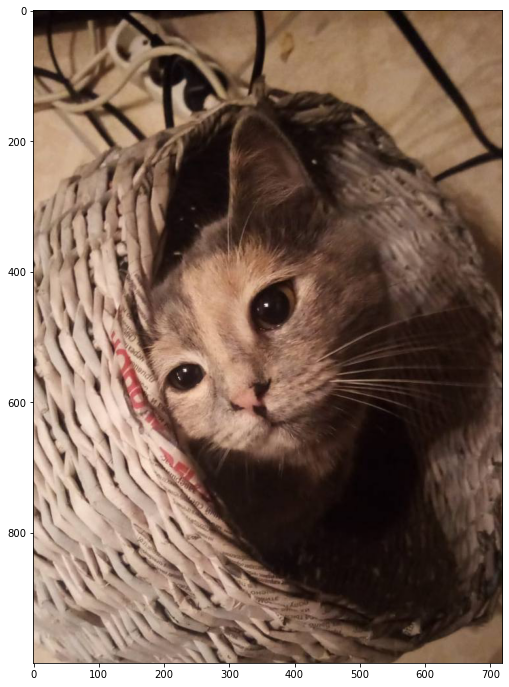

In [82]:
plt.figure(figsize=(12, 12))
plt.imshow(image)

## Создание линейного фильтра (ядро свёртки)

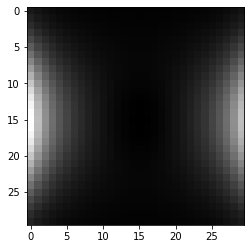

In [137]:
# Some blur

win_size = (30, 30)
sigma1 = 5
sigma2 = 7
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma1**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma1**2 / 2)
        
        w[i,j] -= np.exp(-(i-w.shape[0]//2)**2 / sigma2**2 / 2 
                         +(j-w.shape[1]//2)**2 / sigma2**2 / 2)
w = w / np.sum(w)

plt.imshow(w, cmap='gray')

## Свёртка цветного изобрежения

In [113]:
def convolute(img, f):
    out_img = []
    for c in range(3):
        out_img.append(scipy.signal.correlate2d(img[:,:,c], f, mode='valid'))
    out_img = np.stack(out_img, axis=2)
    return out_img.astype(np.uint8)

In [114]:
filtered_image = convolute(image, w)

In [115]:
filtered_image.shape

(971, 690, 3)

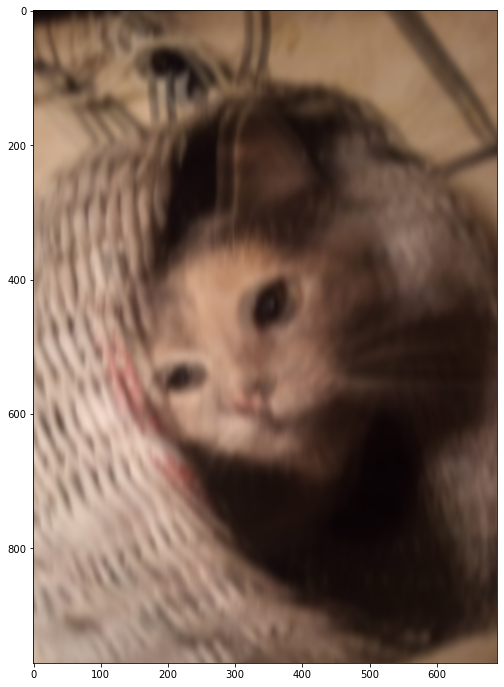

In [116]:
plt.figure(figsize=(12, 12))
plt.imshow(filtered_image)

## Линейные и нелинейные преобразования

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


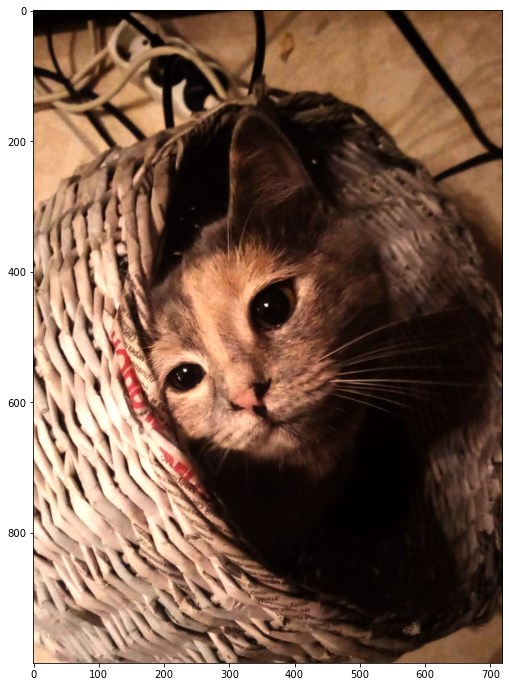

In [135]:
plt.figure(figsize=(12, 12))
plt.imshow(((image/255)**1.5)*1.3)